In [ ]:
from google.colab import drive

# Mounting Google Drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [ ]:
# Listing the files inside the Google Drive directory (Use your own directory)
!ls "/content/gdrive/MyDrive/CS464"

'Colab Notebooks'   dataset  'HW1 DATASET'


In [ ]:
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt
import string
import pandas as pd
from mlxtend.plotting import plot_decision_regions
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from matplotlib.colors import ListedColormap
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from imblearn.ensemble import BalancedBaggingClassifier
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import random
import tensorflow as tf
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import f1_score
import seaborn as sns

In [ ]:
dataset_path = "/content/gdrive/MyDrive/CS464/dataset"

#Preprocessing

First pull the dataset(FER2013) into separate numpy arrays.                          
At the end of this chunk we are going to have 6 numpy arrays which are X_train, y_train, X_val, y_val, X_test, y_test.

Train sets will be used in model training. With validation data, we are going to test the model and try to tune it.                                    

 Lastly, we are going to calculate final predictions and confusion matrix with test sets.


Decision trees are generally not sensitive to the scale of input features. Therefore, for decision tree-based models scaling is not necessary. Decision trees make decisions based on the relationships between features, and the scale of individual features does not impact their performance.

Instead we are going to do flattening and
different preprocessing (imputation) techniques to avoid the negative impacts of the skewed dataset. In this manner, we are going to apply Data Augmentation, Utils Resampling and Balanced Bagging Classification to obtain a better accuracy.

In this section, several imputation and additional classification techniques will be compared by evaluating the performing accuracies with the unrestricted (no given parameter) decision tree model. The only given parameter will be the "criterion". During this comparison, the models is trained with different train datasets and tested with the test dataset.

1- Default Preprocessing

In [ ]:
def getFaceImages(emotions, data_type, print_n=False):
    images = []
    labels = []
    path = "/content/gdrive/MyDrive/CS464/dataset/" + data_type + "/"
    for i,f in enumerate(emotions):
        p = path + f
        j=0
        for image_path in glob.glob(os.path.join(p, "*.jpg")):
            image = cv2.imread(image_path, 0)
            image = cv2.resize(image, (48, 48))
            images.append(image)
            labels.append(i)
            j+=1
        if(print_n):
            print("There are " , j , " " , data_type.upper(), " images of " , emotions[i].upper())
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

In [ ]:
emotions = ['angry','disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

#Get Images and Labels
X, y =  getFaceImages(emotions, 'train', print_n=True)

# Splitting the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_test, y_test = getFaceImages(emotions, 'test', print_n=True)

There are  3995   TRAIN  images of  ANGRY
There are  436   TRAIN  images of  DISGUST
There are  4097   TRAIN  images of  FEAR
There are  7221   TRAIN  images of  HAPPY
There are  4965   TRAIN  images of  NEUTRAL
There are  4830   TRAIN  images of  SAD
There are  3171   TRAIN  images of  SURPRISE
There are  958   TEST  images of  ANGRY
There are  111   TEST  images of  DISGUST
There are  1024   TEST  images of  FEAR
There are  1774   TEST  images of  HAPPY
There are  1239   TEST  images of  NEUTRAL
There are  1247   TEST  images of  SAD
There are  831   TEST  images of  SURPRISE


In [ ]:
X_train_flatten_def = np.array([i.flatten() for i in X_train])
X_test_flatten = np.array([i.flatten() for i in X_test])
X_val_flatten = np.array([i.flatten() for i in X_val])

In [ ]:
classifier_def = DecisionTreeClassifier(criterion = "entropy", random_state=42)
classifier_def.fit(X_train_flatten_def,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
y_pred_def = classifier_def.predict(X_test_flatten)
cm = confusion_matrix(y_test, y_pred_def)
print(cm)
f1_def = f1_score(y_test, y_pred_def, average='weighted')  # You can use 'micro', 'macro', or 'weighted'
print("F1 Score:", f1_def)

[[211  16 124 196 170 166  75]
 [ 10  34  12  18  17   8  12]
 [137  14 262 199 132 147 133]
 [210  29 212 682 256 262 123]
 [164  21 162 240 326 235  91]
 [183  25 221 227 218 284  89]
 [ 72   9 101  98  84  87 380]]
F1 Score: 0.3035589694465556


2- Data Augmentation Preprocessing

In [ ]:
emotions = ['angry','disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

#Get Images and Labels
X_aug, y_aug =  getFaceImages(emotions, 'train_aug', print_n=True)

# Splitting the data into train and validation sets
X_train_aug, X_val_aug, y_train_aug, y_val_aug = train_test_split(X_aug, y_aug, test_size=0.2, random_state=42)

There are  5589   TRAIN_AUG  images of  ANGRY
There are  2598   TRAIN_AUG  images of  DISGUST
There are  5615   TRAIN_AUG  images of  FEAR
There are  5577   TRAIN_AUG  images of  HAPPY
There are  5590   TRAIN_AUG  images of  NEUTRAL
There are  5605   TRAIN_AUG  images of  SAD
There are  5583   TRAIN_AUG  images of  SURPRISE


In [ ]:
X_train_flatten_aug = np.array([i.flatten() for i in X_train_aug])

In [ ]:
classifier_aug = DecisionTreeClassifier(criterion = "entropy", random_state=42)
classifier_aug.fit(X_train_flatten_aug,y_train_aug)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
y_pred_aug = classifier_aug.predict(X_test_flatten)
cm = confusion_matrix(y_test, y_pred_aug)
print(cm)
f1_aug = f1_score(y_test, y_pred_aug, average='weighted')  # You can use 'micro', 'macro', or 'weighted'
print("F1 Score:", f1_aug)

[[211  49 137 145 147 150 119]
 [ 16   6  15  22  19  18  15]
 [148  49 242 108 157 169 151]
 [253  94 239 458 291 273 166]
 [169  54 177 178 285 230 146]
 [191  67 197 175 225 267 125]
 [ 72  28 101  60  88  86 396]]
F1 Score: 0.2632162462427691


3- Resample Preprocessing

In [ ]:
# Print the class distribution before resampling
print("Class distribution before resampling:")
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))
# Combine X_train and y_train for resampling
train_data = np.column_stack((X_train_flatten_def, y_train))
# Initialize variables to store upsampled data
upsampled_data = []

# Identify the class with the maximum samples
majority_class_label = unique[np.argmax(counts)]

# Upsample each minority class to match the size of the majority class
for label in unique:
    if label != majority_class_label:
        minority_class = train_data[train_data[:, -1] == label]
        minority_upsampled = resample(minority_class, replace=True, n_samples=counts.max(), random_state=42)
        upsampled_data.append(minority_upsampled)

# Combine the upsampled minority classes with the majority class
combined_data = np.vstack([train_data[train_data[:, -1] == majority_class_label]] + upsampled_data)

# Separate features and labels after resampling
X_resampled = combined_data[:, :-1]
y_resampled = combined_data[:, -1]

# Print the class distribution after resampling
print("\nClass distribution after resampling:")
unique, counts = np.unique(y_resampled, return_counts=True)
print(dict(zip(unique, counts)))

Class distribution before resampling:
{0: 3217, 1: 344, 2: 3262, 3: 5737, 4: 4018, 5: 3845, 6: 2549}

Class distribution after resampling:
{0: 5737, 1: 5737, 2: 5737, 3: 5737, 4: 5737, 5: 5737, 6: 5737}


In [ ]:
classifier_res = DecisionTreeClassifier(criterion = "entropy", random_state=42)
classifier_res.fit(X_resampled,y_resampled)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
y_pred_res = classifier_res.predict(X_test_flatten)
cm = confusion_matrix(y_test, y_pred_res)
print(cm)
f1_res = f1_score(y_test, y_pred_res, average='weighted')  # You can use 'micro', 'macro', or 'weighted'
print("F1 Score:", f1_res)

[[216  19 110 253 145 140  75]
 [ 11  31  13  29   7  12   8]
 [141  18 252 218 149 148  98]
 [218  23 205 682 250 257 139]
 [147  21 149 357 283 166 116]
 [172  18 203 305 202 248  99]
 [ 87  13  96 129  69  69 368]]
F1 Score: 0.28660378448129


4- Balanced Bagging Classification

Balanced Bagging is a tool for classification when dealing with uneven datasets. It helps fix the issue of some classes having too few examples by combining bagging with balanced sampling. This ensures that each training subset has an equal mix of all classes, preventing bias toward the majority. The result is better overall performance, less sensitivity to noisy data, and improved reliability. Unlike preprocessing methods that change the dataset before training, Balanced Bagging works during training, making it an effective way to handle class imbalance.

In [ ]:
classifier_BBC = BalancedBaggingClassifier(base_estimator= DecisionTreeClassifier(criterion = "entropy", random_state=42),
                                                 n_estimators=50,
                                                 sampling_strategy='auto',  # 'auto' uses the inverse of class frequencies
                                                 random_state=42)
classifier_BBC.fit(X_train_flatten_def, y_train)

BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                random_state=42),
                          n_estimators=50, random_state=42)

In [ ]:
y_pred_BBC = classifier_BBC.predict(X_test_flatten)
cm = confusion_matrix(y_test, y_pred_BBC)
print(cm)
f1_BBC = f1_score(y_test, y_pred_BBC, average='weighted')  # You can use 'micro', 'macro', or 'weighted'
print("F1 Score:", f1_BBC)

[[279  23 134 144 130 145 103]
 [ 16  53   5  13  10   6   8]
 [155  30 228 130 139 142 200]
 [237  54 195 693 255 180 160]
 [192  32 152 186 387 151 139]
 [249  41 171 155 208 312 111]
 [ 52   5  78  66  65  47 518]]
F1 Score: 0.34181266990845965


5- SMOTE

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_flatten_def, y_train)

In [ ]:
classifier_smote = DecisionTreeClassifier(criterion = "entropy", random_state=42)
classifier_smote.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
y_pred_smote = classifier_smote.predict(X_test_flatten)
cm = confusion_matrix(y_test, y_pred_smote)
print(cm)
f1_smote = f1_score(y_test, y_pred_smote, average='weighted')  # You can use 'micro', 'macro', or 'weighted'
print("F1 Score:", f1_smote)

[[211  49 144 145 147 158 104]
 [ 16  38  13  14   6  16   8]
 [124  57 247 143 155 156 142]
 [241  87 229 525 274 251 167]
 [158  58 177 212 316 210 108]
 [190  57 179 195 212 286 128]
 [ 92  39  95  83  69  78 375]]
F1 Score: 0.28091431551903057


6- Random Oversampler

In [ ]:
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train.reshape(-1, 48 * 48), y_train)

In [ ]:
classifier_ros = DecisionTreeClassifier(criterion = "entropy", random_state=42)
classifier_ros.fit(X_ros,y_ros)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
y_pred_ros = classifier_ros.predict(X_test_flatten)
cm = confusion_matrix(y_test, y_pred_ros)
print(cm)
f1_ros = f1_score(y_test, y_pred_ros, average='weighted')  # You can use 'micro', 'macro', or 'weighted'
print("F1 Score:", f1_ros)

[[220  14 121 200 159 168  76]
 [ 14  32  18  16  12   8  11]
 [137  13 264 202 152 160  96]
 [217  23 233 596 341 254 110]
 [145  22 150 284 320 223  95]
 [180  22 190 251 224 265 115]
 [ 80  12 111 102  84  88 354]]
F1 Score: 0.2858923360187727


Let's show the performances of different preprocesses in a chart:

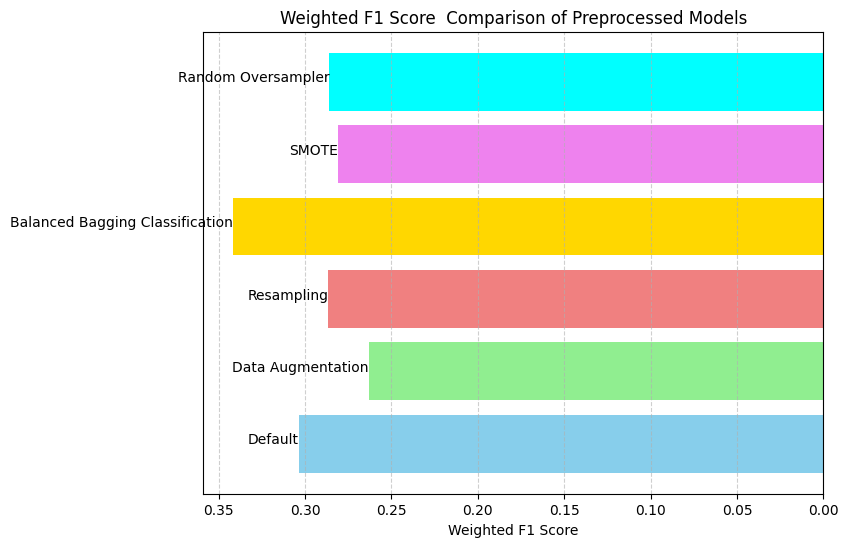

In [ ]:
models = ['Default', 'Data Augmentation', 'Resampling', 'Balanced Bagging Classification', 'SMOTE', 'Random Oversampler']
accuracy = [0.30355, 0.26321, 0.28660, 0.34181, 0.28091, 0.28589]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create a horizontal bar graph with colors
bars = ax.barh(models, accuracy, color=['skyblue', 'lightgreen', 'lightcoral','gold', 'violet','cyan' ])

# Add data values and model names on top of the bars
for bar, model in zip(bars, models):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, model, ha='right', va='baseline', color='black', fontsize=10)

# Add labels and title
plt.xlabel('Weighted F1 Score')
plt.title('Weighted F1 Score  Comparison of Preprocessed Models')

# Remove the y-axis label
ax.yaxis.set_visible(False)

# Add a grid for better readability
ax.xaxis.grid(True, linestyle='--', alpha=0.6)

# Invert the x-axis for better visual appeal
ax.invert_xaxis()

# Show the graph
plt.show()


#Tuning (Validation)

Grid Search

In [ ]:
# param_grid_all = {
#     'criterion': ['gini', 'entropy'],
#     'splitter': ['best', 'random'],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None],
#     'max_leaf_nodes': [None, 5, 10, 20],
#     'min_impurity_decrease': [0.0, 0.1, 0.2],
#     'class_weight': [None, 'balanced'],
# }

For computational time to decrease, only essential ones should be chosen. Because of this, prior information on what to search and what to not gains improtance.

For visual data, choosing between 'gini' and 'entropy' depends on whether different features have varied importance. If your dataset is imbalanced, adjusting class weights, especially with 'balanced,' helps the model pay attention to all classes, ensuring it doesn't favor the majority. These choices are key for a better decision tree model in visual datasets. It is also meaningless to add max_features because x_train_flatten only include 1 feature. Therefore, it is sensible to exclude  them from search grid.

In [ ]:
param_grid1 = {
    'base_estimator__criterion': ["gini","entropy"],
    'base_estimator__max_depth': [6, 8, 10]
}

# Create the grid search object
grid_search1 = GridSearchCV(estimator=classifier_BBC, param_grid=param_grid1, scoring='accuracy', cv=5)
# Fit the grid search to the data
grid_search1.fit(X_train_flatten_def, y_train)

GridSearchCV(cv=5,
             estimator=BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                       random_state=42),
                                                 n_estimators=50,
                                                 random_state=42),
             param_grid={'base_estimator__criterion': ['gini', 'entropy'],
                         'base_estimator__max_depth': [6, 8, 10]},
             scoring='accuracy')

In [ ]:
# Get the best hyperparameters from the grid search
best_params1 = grid_search1.best_params_
print("Best Hyperparameters:", best_params1)

Best Hyperparameters: {'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 10}


In [ ]:
# Use the best model to make predictions on the validation set
best_grid_model = grid_search1.best_estimator_
y_pred_val1 = best_grid_model.predict(X_val_flatten)
y_pred_val1

array([6, 4, 6, ..., 4, 2, 6])

In [ ]:
cm1 = confusion_matrix(y_pred_val1,y_val)
print(cm1)
accuracy_score(y_val, y_pred_val1)

[[173   7  90 140  95 141  34]
 [ 28  35  36  39  30  35  18]
 [ 81  10 176 117  85 125  70]
 [130  10 130 653 152 151  47]
 [134  11  98 221 321 180  40]
 [133  10 136 162 149 251  48]
 [ 99   9 169 152 115 102 365]]


0.34372279296534913

In [ ]:
param_sets1 = grid_search1.cv_results_['params']
criterion_values1 = [params['base_estimator__criterion'] for params in param_sets1]
max_depth_values1 = [params['base_estimator__max_depth'] for params in param_sets1]
accuracy_results1 = grid_search1.cv_results_['split1_test_score']
# Create a DataFrame to display the results
results_df1 = pd.DataFrame({ 'Accuracy': accuracy_results1, 'Criterion': criterion_values1, 'Max_Depth': max_depth_values1})
results_df1.at[2,'Accuracy'] = 0.34372279
results_df1

,Accuracy,Criterion,Max_Depth
0,0.304461,gini,6
1,0.334276,gini,8
2,0.343723,gini,10
3,0.295539,entropy,6
4,0.303156,entropy,8
5,0.310990,entropy,10


In [ ]:
transpose_df1 = results_df1.transpose()
transpose_df1.at['Accuracy',2] = 0.34372279
transpose_df1

,0,1,2,3,4,5
Accuracy,0.304461,0.334276,0.343723,0.295539,0.303156,0.31099
Criterion,gini,gini,gini,entropy,entropy,entropy
Max_Depth,6,8,10,6,8,10


Draw a graph

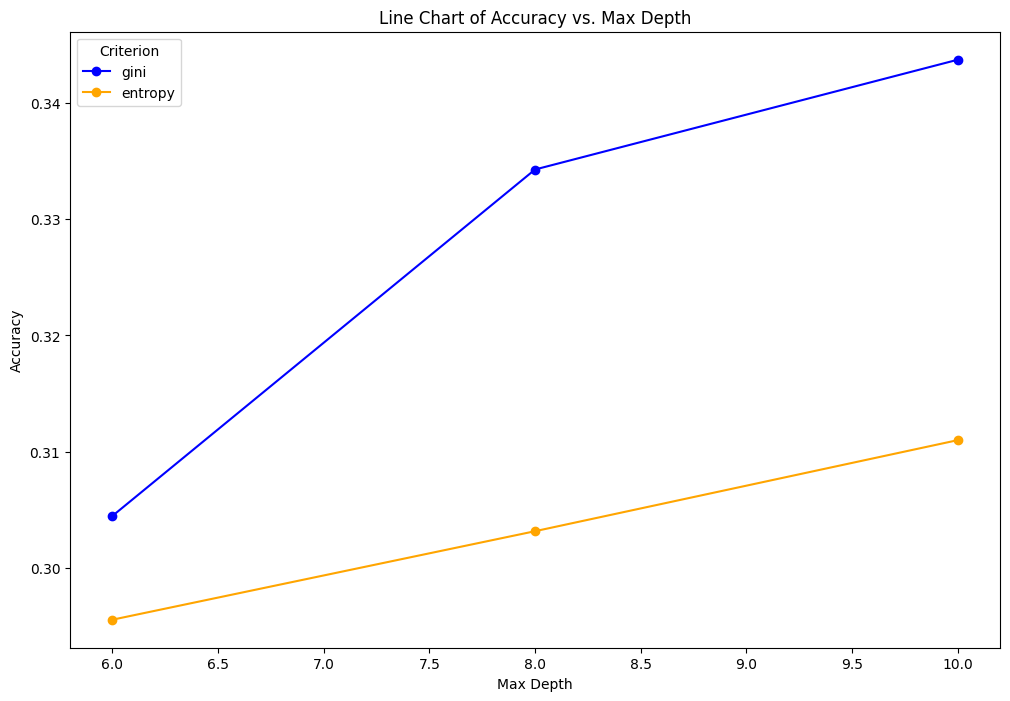

In [ ]:
gini_data1 = results_df1[results_df1['Criterion'] == 'gini']
entropy_data1 = results_df1[results_df1['Criterion'] == 'entropy']

# Create a line chart for max depth vs. accuracy, colored by criterion
plt.figure(figsize=(12, 8))

plt.plot(gini_data1['Max_Depth'], gini_data1['Accuracy'], label='gini', marker='o', linestyle='-', color='blue')
plt.plot(entropy_data1['Max_Depth'], entropy_data1['Accuracy'], label='entropy', marker='o', linestyle='-', color='orange')

plt.title('Line Chart of Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend(title='Criterion')
plt.show()

In [ ]:
param_grid2 = {
    'base_estimator__criterion': ["gini"],
    'base_estimator__max_depth': [10, 12, 14],
    'base_estimator__min_impurity_decrease': [0, 0.25]
}
grid_model2 = classifier_BBC
# Create the grid search object
grid_search2 = GridSearchCV(estimator=grid_model2, param_grid=param_grid2, scoring='accuracy', cv=5)
# Fit the grid search to the data
grid_search2.fit(X_train_flatten_def, y_train)

/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                       random_state=42),
                                                 n_estimators=50,
                                                 random_state=42),
             param_grid={'base_estimator__criterion': ['gini'],
                         'base_estimator__max_depth': [10, 12, 14],
                         'base_estimator__min_impurity_decrease': [0, 0.25]},
             scoring='accuracy')

In [ ]:
# Get the best hyperparameters from the grid search
best_params2 = grid_search2.best_params_
print("Best Hyperparameters:", best_params2)

Best Hyperparameters: {'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 10, 'base_estimator__min_impurity_decrease': 0}


In [ ]:
# Use the best model to make predictions on the validation set
best_grid_model2 = grid_search2.best_estimator_
y_pred_val2 = best_grid_model2.predict(X_val_flatten)
y_pred_val2

array([6, 4, 6, ..., 4, 2, 6])

In [ ]:
cm2 = confusion_matrix(y_pred_val2,y_val)
print(cm2)
accuracy_score(y_val, y_pred_val2)

[[173   7  90 140  95 141  34]
 [ 28  35  36  39  30  35  18]
 [ 81  10 176 117  85 125  70]
 [130  10 130 653 152 151  47]
 [134  11  98 221 321 180  40]
 [133  10 136 162 149 251  48]
 [ 99   9 169 152 115 102 365]]


0.34372279296534913

Make second dataframe

In [ ]:
param_sets2 = grid_search2.cv_results_['params']
min_impurity2 = [params['base_estimator__min_impurity_decrease'] for params in param_sets2]
max_depth_values2 = [params['base_estimator__max_depth'] for params in param_sets2]
accuracy_results2 = grid_search2.cv_results_['mean_test_score']
# Create a DataFrame to display the results
results_df2 = pd.DataFrame({ 'Accuracy': accuracy_results2, 'Min Impurity': min_impurity2, 'Max Depth': max_depth_values2})
results_df2

,Accuracy,Min Impurity,Max Depth
0,0.343723,0.00,10
1,0.140040,0.25,10
2,0.326658,0.00,12
3,0.140040,0.25,12
4,0.327311,0.00,14
5,0.140040,0.25,14


In [ ]:
transpose_df2 = results_df2.transpose()
transpose_df2

,0,1,2,3,4,5
Accuracy,0.343723,0.14004,0.326658,0.14004,0.327311,0.14004
Min Impurity,0.000000,0.25000,0.000000,0.25000,0.000000,0.25000
Max Depth,10.000000,10.00000,12.000000,12.00000,14.000000,14.00000


Draw second graph

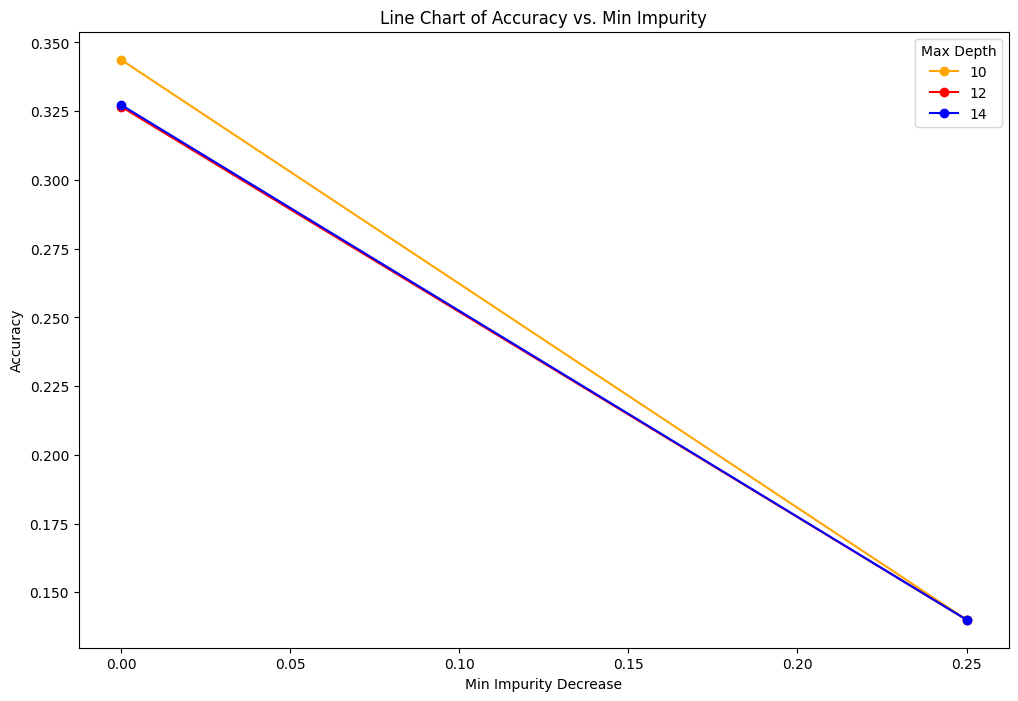

In [ ]:
max_depth1  = results_df2[results_df2['Max Depth'] == 10]
max_depth2  = results_df2[results_df2['Max Depth'] == 12]
max_depth3  = results_df2[results_df2['Max Depth'] == 14]

plt.figure(figsize=(12, 8))
plt.plot(max_depth1['Min Impurity'], max_depth1['Accuracy'], label=10, marker='o', linestyle='-', color='orange')
plt.plot(max_depth2['Min Impurity'], max_depth2['Accuracy'], label=12, marker='o', linestyle='-', color='red')
plt.plot(max_depth3['Min Impurity'], max_depth3['Accuracy'], label=14, marker='o', linestyle='-', color='blue')

plt.title('Line Chart of Accuracy vs. Min Impurity')
plt.xlabel('Min Impurity Decrease')
plt.ylabel('Accuracy')
plt.legend(title='Max Depth')
plt.show()

In [ ]:
param_grid3 = {
    'base_estimator__criterion': ["gini"],
    'base_estimator__max_depth': [14],
    'base_estimator__min_impurity_decrease' : [0],
    'base_estimator__min_samples_leaf': [0.5, 2, 3.5]
}

grid_model3 = classifier_BBC
# Create the grid search object
grid_search3 = GridSearchCV(estimator=grid_model3, param_grid=param_grid3, scoring='accuracy', cv=5)
# Fit the grid search to the data
grid_search3.fit(X_train_flatten_def, y_train)

GridSearchCV(cv=5,
             estimator=BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                       random_state=42),
                                                 n_estimators=50,
                                                 random_state=42),
             param_grid={'base_estimator__criterion': ['gini'],
                         'base_estimator__max_depth': [14],
                         'base_estimator__min_impurity_decrease': [0],
                         'base_estimator__min_samples_leaf': [0.5, 2, 3.5]},
             scoring='accuracy')

In [ ]:
# Get the best hyperparameters from the grid search
best_params3 = grid_search3.best_params_
print("Best Hyperparameters:", best_params3)

Best Hyperparameters: {'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 14, 'base_estimator__min_impurity_decrease': 0, 'base_estimator__min_samples_leaf': 2}


In [ ]:
# Use the best model to make predictions on the validation set
best_grid_model3 = grid_search3.best_estimator_
y_pred_val3 = best_grid_model3.predict(X_val_flatten)
y_pred_val3

array([6, 4, 6, ..., 4, 6, 1])

In [ ]:
cm3 = confusion_matrix(y_pred_val3,y_val)
print(cm3)
accuracy_score(y_val, y_pred_val3)

[[187  10 104 149  76 136  37]
 [ 21  34  28  48  32  19  14]
 [ 79   8 186 143 106 127  63]
 [134   9 108 633 116 144  52]
 [134  11 113 230 358 176  46]
 [136   9 142 157 165 281  40]
 [ 87  11 154 124  94 102 370]]


0.3567821695977712

In [ ]:
param_sets3 = grid_search3.cv_results_['params']
min_samples_leaf3 = [params['base_estimator__min_samples_leaf'] for params in param_sets3]
accuracy_results3 = grid_search3.cv_results_['mean_test_score']
# Create a DataFrame to display the results
results_df3 = pd.DataFrame({ 'Accuracy': accuracy_results3, 'Min_samples_leaf': min_samples_leaf3})
results_df3

,Accuracy,Min_samples_leaf
0,0.189883,0.5
1,0.356782,2.0
2,NaN,3.5


In [ ]:
transpose_df3 = results_df3.transpose()
transpose_df3

,0,1,2
Accuracy,0.189883,0.356782,NaN
Min_samples_leaf,0.500000,2.000000,3.5


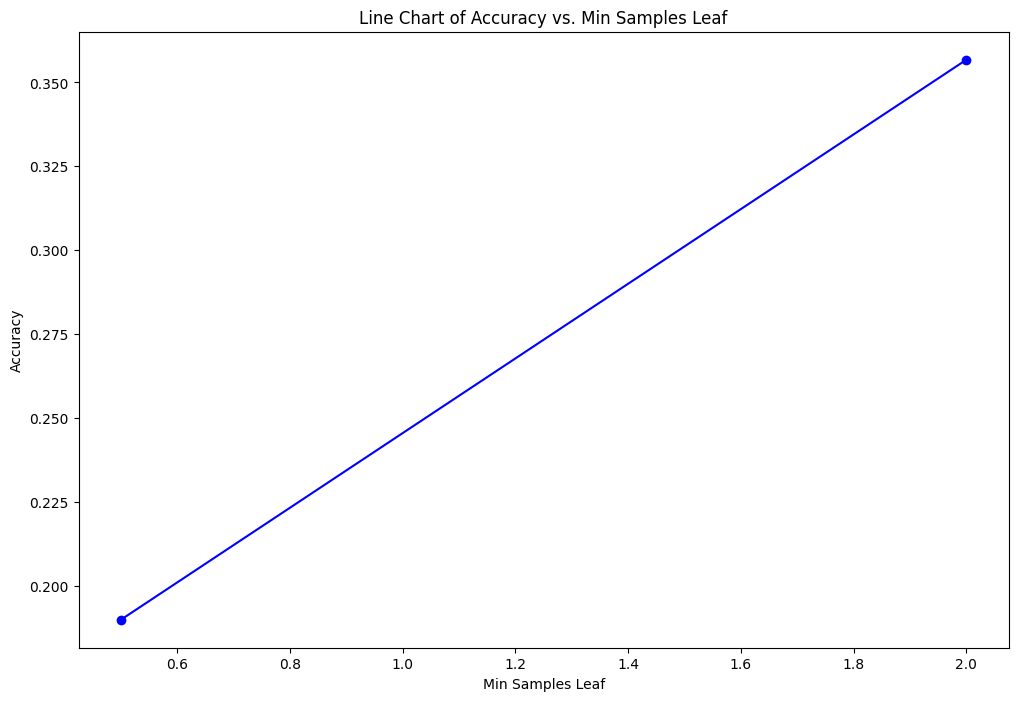

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(results_df3['Min_samples_leaf'], results_df3['Accuracy'], label=10, marker='o', linestyle='-', color='blue')

plt.title('Line Chart of Accuracy vs. Min Samples Leaf')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')
plt.show()

#Model

Final Model

In [ ]:
best_decision_clf = DecisionTreeClassifier(criterion = "gini",
                       random_state=42,
                       max_depth = 10,
                       min_impurity_decrease = 0,
                       min_samples_leaf = 2)

classifier_BBC_best = BalancedBaggingClassifier(base_estimator= best_decision_clf,
                                                 n_estimators=50,
                                                 sampling_strategy='auto',
                                                 random_state=42)


classifier_BBC_best.fit(X_train_flatten_def, y_train)

BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                                min_impurity_decrease=0,
                                                                min_samples_leaf=2,
                                                                random_state=42),
                          n_estimators=50, random_state=42)

#Prediction and Evaluation

Predict

In [ ]:
y_pred_best = classifier_BBC_best.predict(X_test_flatten)
#y_pred = np.argmax(y_pred, axis=1)
#y_test_n = np.argmax(y_test, axis=1)

Confusion Matrix


[[203  41 137 161 125 163 128]
 [  7  51  15  17   6   5  10]
 [112  37 195 147 124 180 229]
 [169  65 131 763 268 216 162]
 [125  35 142 186 385 221 145]
 [176  55 173 169 214 356 104]
 [ 69  17  80  56  62  52 495]]


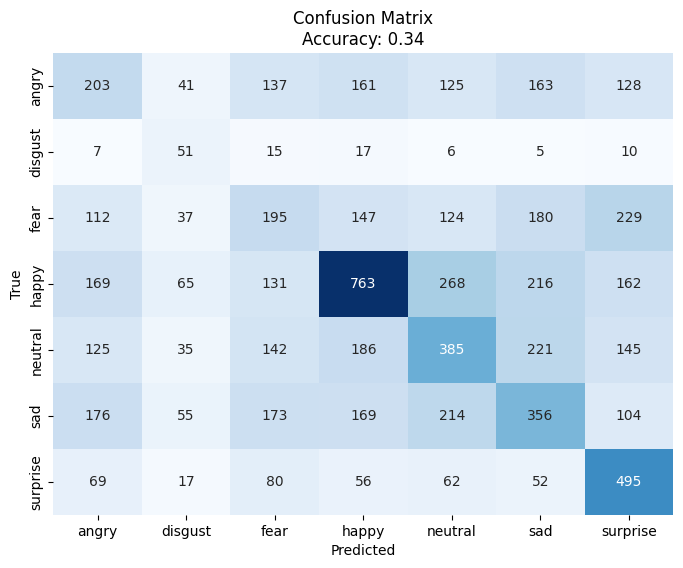

In [ ]:
cm = confusion_matrix(y_test, y_pred_best)
print(cm)
accuracy = accuracy_score(y_test, y_pred_best)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['angry','disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'], yticklabels=['angry','disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')
plt.show()